### Step 1: Continuum fit

In this tutorial, we will recover the redshift and line properties for the blazar PKSJ0049-5738 analysed in the previous tutorials.

Let's start by importing the `analysis()` class from **easyspec**:

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from easyspec.analysis import analysis
analysis = analysis()

easyspec-analysis version:  1.0.0


Let's load our data:

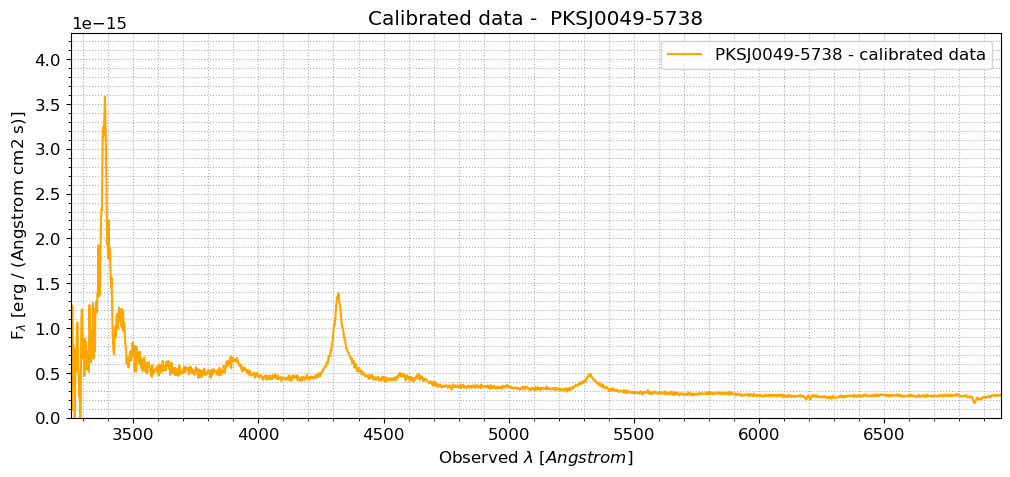

In [21]:
wavelengths, flux_density = analysis.load_calibrated_data("./PKSJ0049-5738_results/PKSJ0049-5738_spec_0.dat",
                                          target_name="PKSJ0049-5738", output_dir = "./PKSJ0049-5738_results", plot = True)

## Finding the lines

Here we have to define a list with several wavelength intervals corresponding to the continuum, as shown in the variable **continuum_regions** below.

The adopted **method** for the continuum extraction here will be a power law. The options are 'powerlaw' (or 'pl') and 'median_filter'. The 'powerlaw' method is better in case you have large emission/absorption lines, while the method 'median_filter' is excellent for extracting the continuum of a spectrum with narrow emission/absorption lines.

**line_significance_sigma**: Defines how many standard deviations above the local continuum the line peak must be in order to be detected.

**peak_distance**: This is the minimal distance (data bins, not in Angstroms) between peaks (it has to be >=1).

**peak_width**: This is the minimum required width of peaks in data bins. The number of data bins is equal to the number of pixels in the reduced spectral image.

**smooth_window**: This is the size of the smooth window for the "median_filter" method. This number must be odd. We can actually ignore it here.

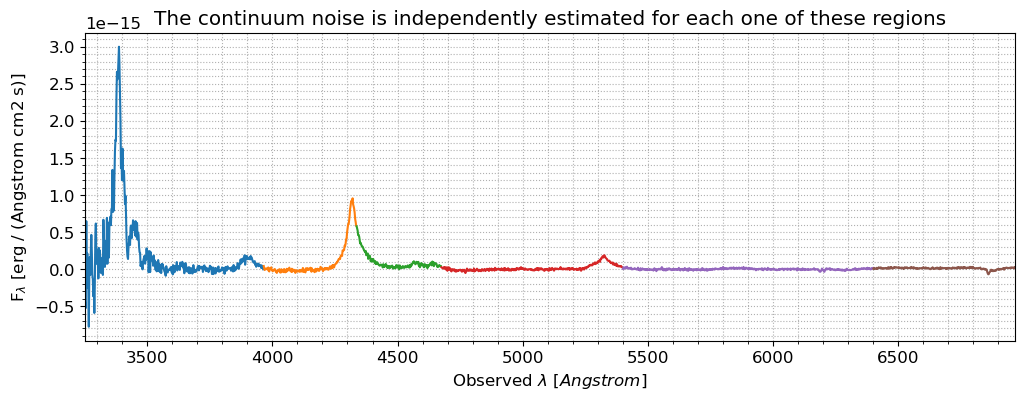

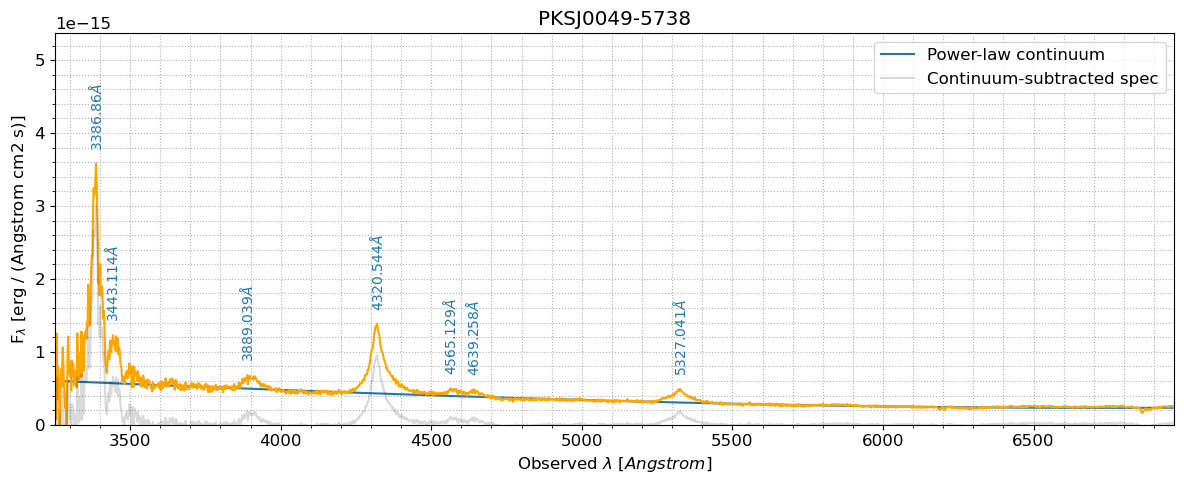

In [22]:
continuum_regions = [[3700,3830],[4100,4200],[4470,4550],[4800,5200],[5600,6000],[6800,7000]]
continuum_baseline, line_std_deviation, wavelength_peak_positions, peak_heights, line_significance = analysis.find_lines(wavelengths, flux_density,
                    line_significance_sigma = 5, peak_distance = 18,
                    peak_width = 3, method="pl", continuum_regions=continuum_regions, pl_order=3,
                    smooth_window=55,plot_lines = True, plot_regions = True, save_plot = True)

We found 7 emission lines with a significance greater than $5\sigma$ in this data. Try playing with the parameters of this function to see how the results change.

## Setting the rest-frame wavelengths and line names

Now we have to tell ``easyspec`` what are the rest-frame wavelengths for the lines found above.

Note that if you know only one or two lines, it is already enough to estimate the spectrum. If, for instance, you want to do this analysis only for 2 out of the 7 lines found above, you can use the commented lines below. For this tutorial, however, we will assume yo uare interested in all 7 lines:

In [23]:
# For the commented part: let's suppose you know how to identify only the Lyalpha and CIV lines:
wavelength_peak_positions_slice = wavelength_peak_positions # wavelength_peak_positions[[0,3]]
rest_frame_line_wavelengths = [1215.670, 1238.821, 1398, 1549, 1640.420, 1664, 1908.734] # [1215.670, 1549]
line_names = ["Lyalpha", "NV","SiIV", "CIV","HeII","O_III]", "C_III]"] # ["Lyalpha", "CIV"]
peak_heights_slice = peak_heights # peak_heights[[0,3]]
line_std_deviation_slice = line_std_deviation # line_std_deviation[[0,3]]
which_models= "Lorentz"
overplot_archival_lines = ["H","He","O","Ne","C","Si","N"]

Note that we are not being very precise with the rest-frame wavelength of the doublet lines. Do it with the precision necessary for you.

In the variable which_models, we can set a single model to be adopted for all the lines, or give a list with a specific model for each line, e.g.: *which_models = ["Lorentz","Gaussian","Gaussian","Voigt","Voigt","Lorentz","Lorentz"]*

In the variable **overplot_archival_lines**, we can ask ``easyspec`` to overplot archival lines to our data, such that it can help us to identify the lines we are not sure about (check it in the plot below). If you set **overplot_archival_lines = "all"**, ``easyspec`` will plot all of its database. This is typically not a wise decision since we have so many lines that they start to overlap. Be aware that the ``easyspec`` database does not give you the full list of atomic emission lines. It gives you a list with several lines tipically found in astrophysical objects. The goal of this variable is to help the user to identify new lines.

## Running the MCMC

Before estimating the parameters, the user can set the **priors** for each individual line or set priors as None such taht ``easyspec`` will do the job automatically. If **priors = None**, the priors for the peak position are set to wavelength_peak_positions +- 100 Angstroms (or to half the distance to the closest line if this line is closer than 100 Angstroms), the priors for the peak height are set to $0.1 \times peak\_heights$ up to $10 \times peak\_heights$ (normalized based on the continuum), and the std or fwhm are confined within 0.1 to 150 Angstroms. To use your own priors, please check the documentation of the function below with the command "*analysis.fit_lines?*".

In [24]:
priors = None

In the function below we set **blended_line_min_separation = 80**. This is the minimum separation between blended line peaks in Angstrom. If the line peaks are closer than this value, a blended model will be adopted. **Be aware that ``easyspec`` accepts up to three blended lines!**

In the variable **N_cores** we are asking ``easyspec`` to use 4 cores and then speed up the MCMC process.

For more information about this function, please check its documentation with the command "*analysis.fit_lines?*"

Running burn-in...


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.05it/s]


Running production...


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 34.42it/s]


Multiprocessing took 8.8 seconds


Running burn-in...


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 51.63it/s]


Running production...


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 57.79it/s]


Multiprocessing took 5.5 seconds
Running burn-in...


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 51.06it/s]


Running production...


100%|█████████████████████████████████████████| 200/200 [00:03<00:00, 65.49it/s]


Multiprocessing took 5.1 seconds


Running burn-in...


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.77it/s]


Running production...


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 35.17it/s]


Multiprocessing took 8.4 seconds
Running burn-in...


100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 66.69it/s]


Running production...


100%|█████████████████████████████████████████| 200/200 [00:02<00:00, 69.04it/s]


Multiprocessing took 4.4 seconds
Archival lines are taken from NIST Atomic Spectra database: https://www.nist.gov/pml/atomic-spectra-database
We adopt vacuum wavelengths for lines with wavelengths < 2000 Angstroms and air wavelengths for lines with wavelengths > 2000 Angstroms.
If you use these lines in your research, please cite the NIST Atomic Spectra database appropriately.


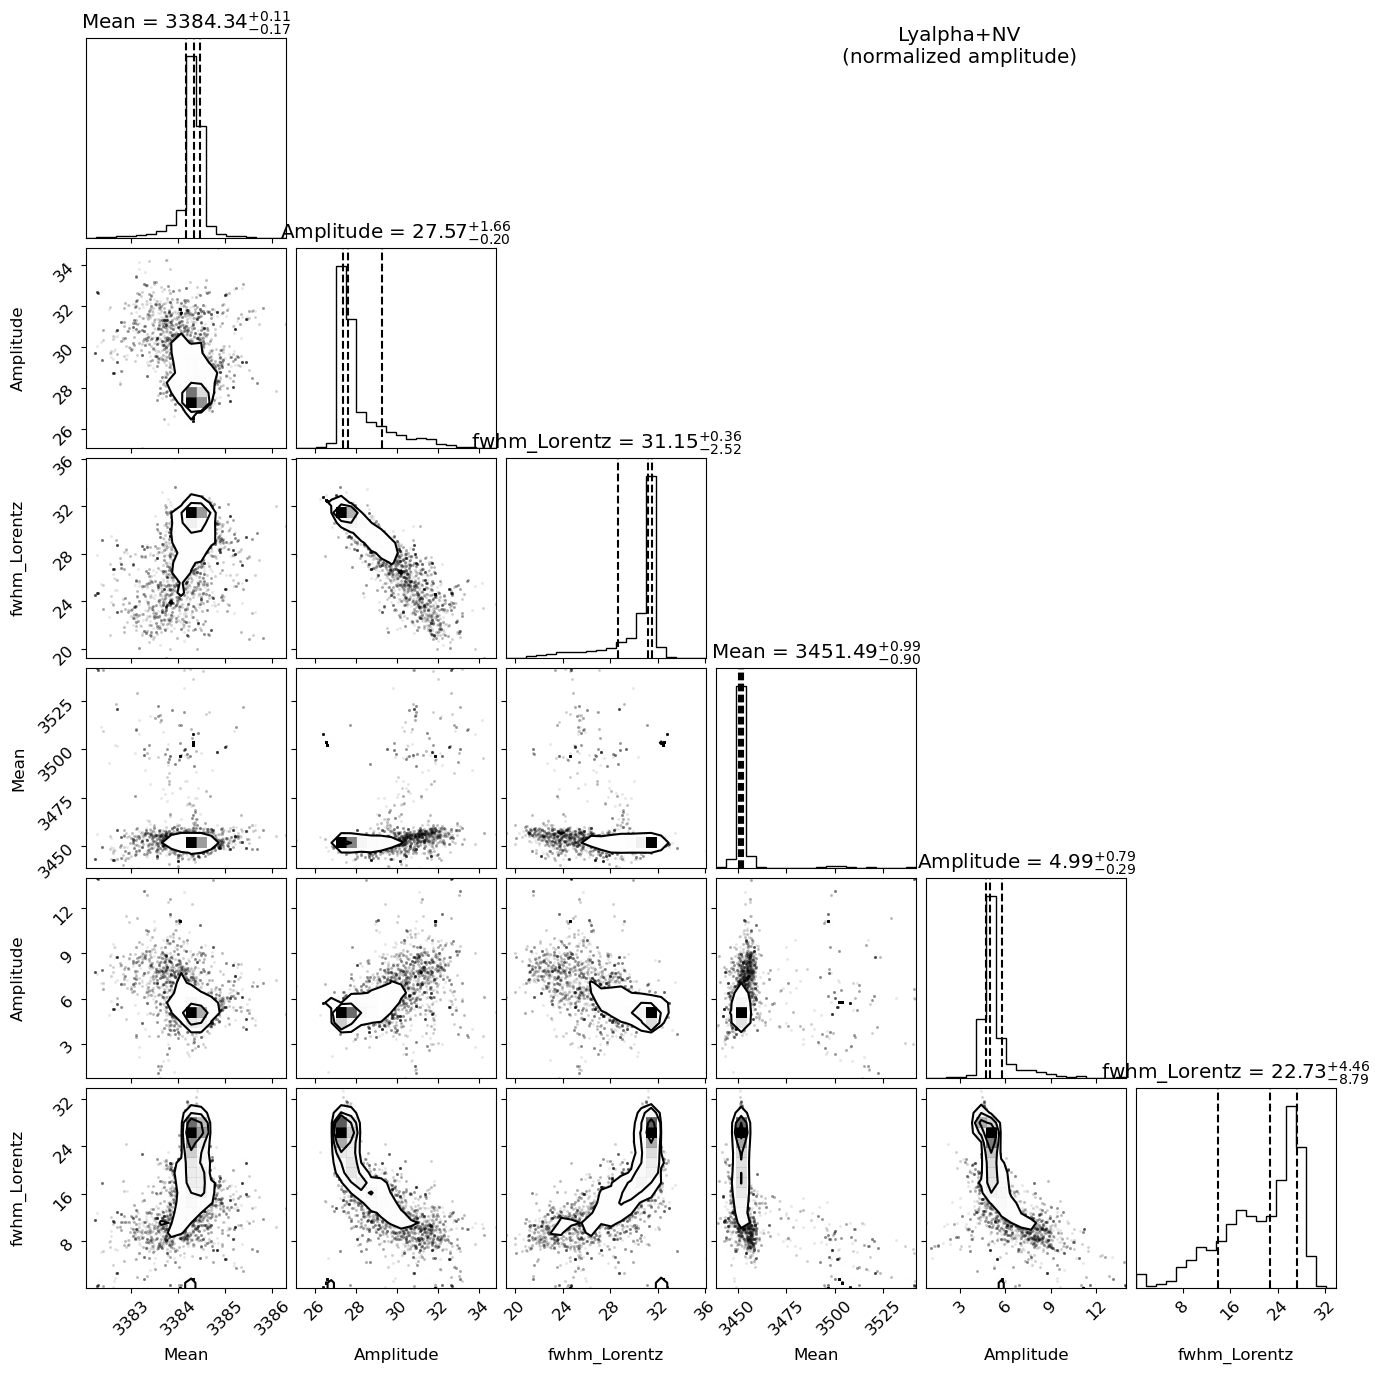

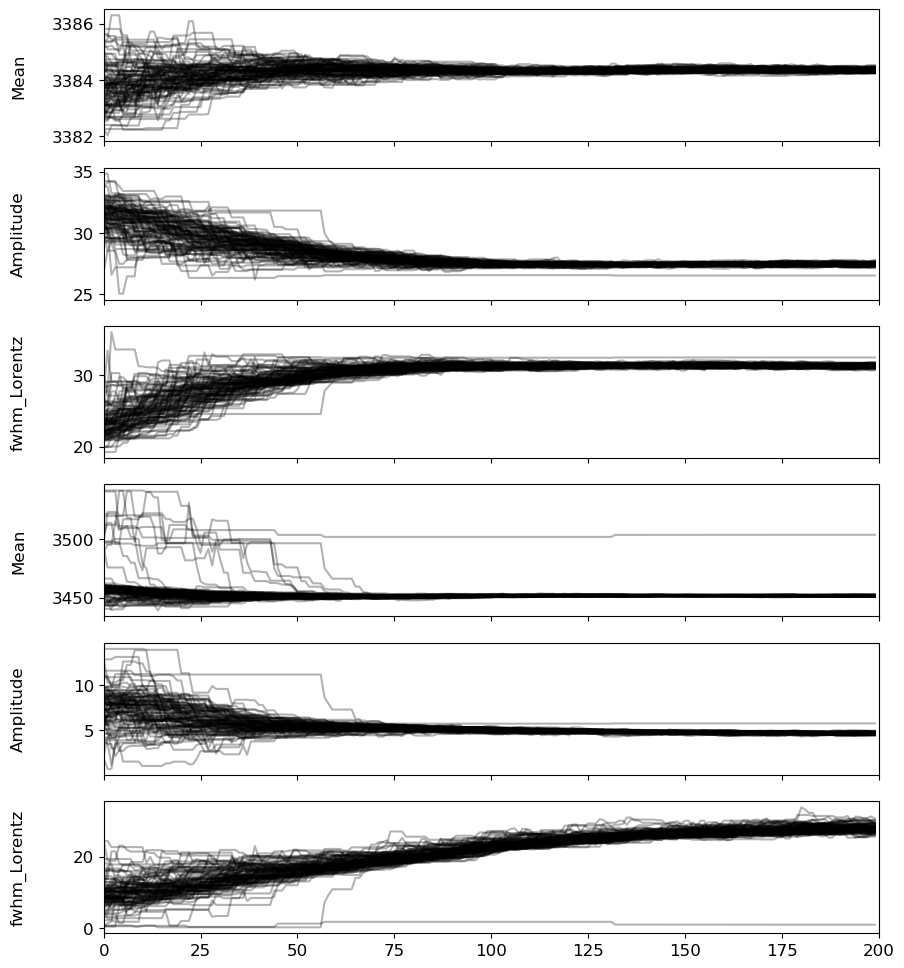

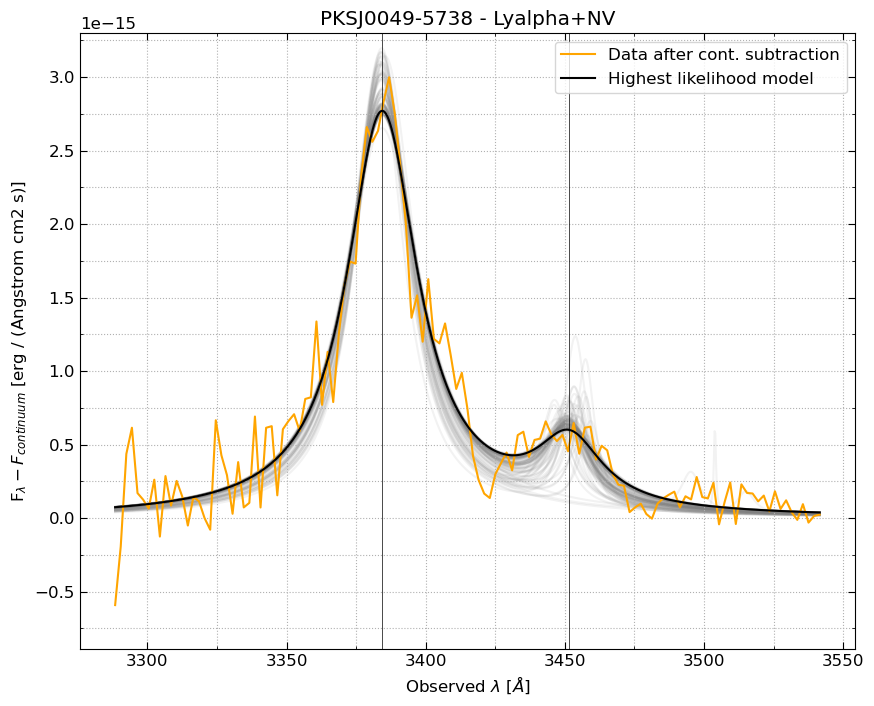

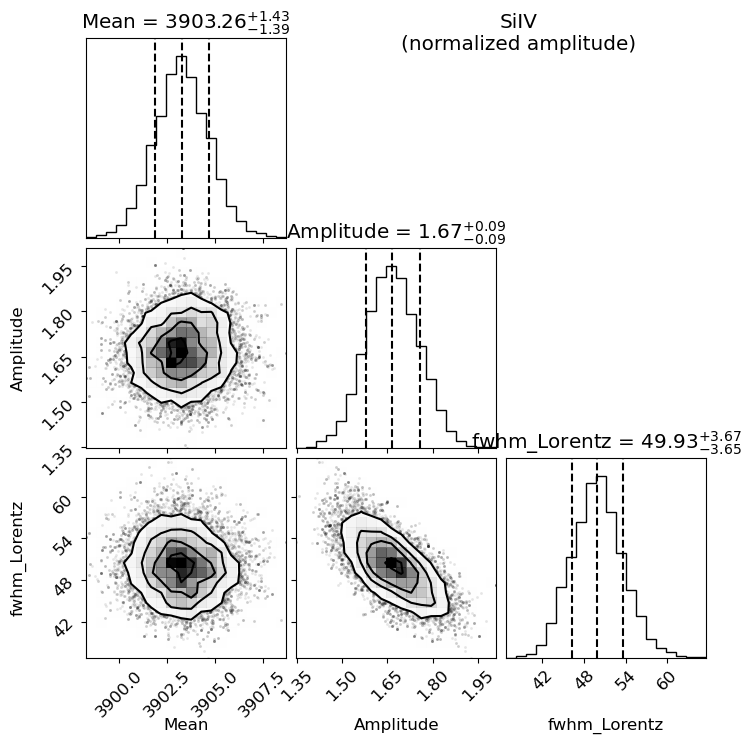

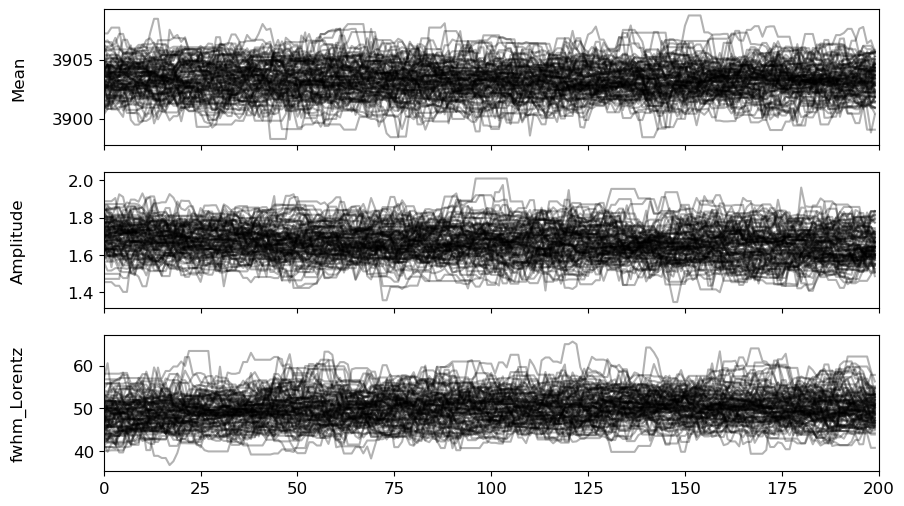

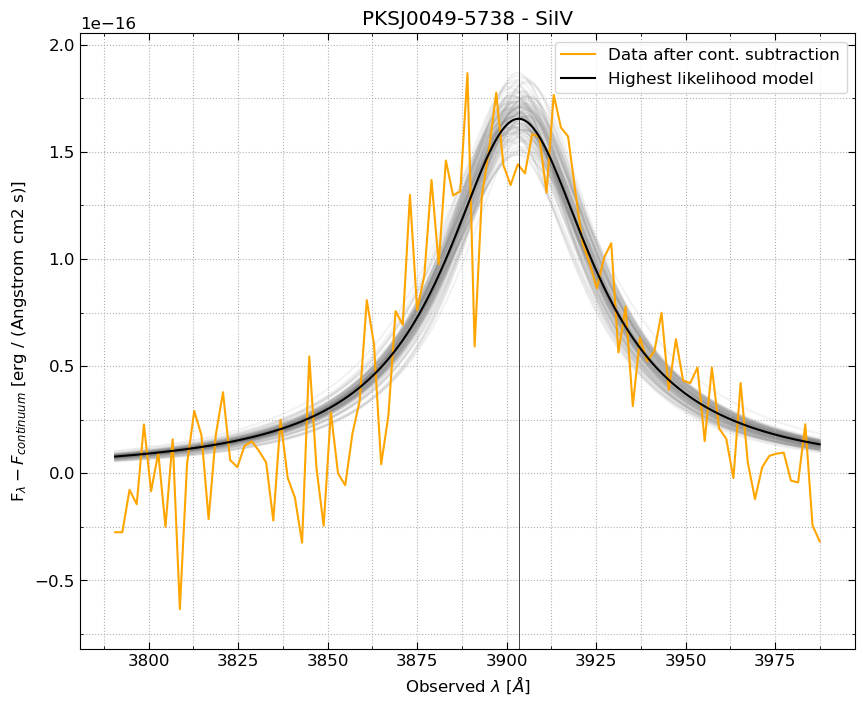

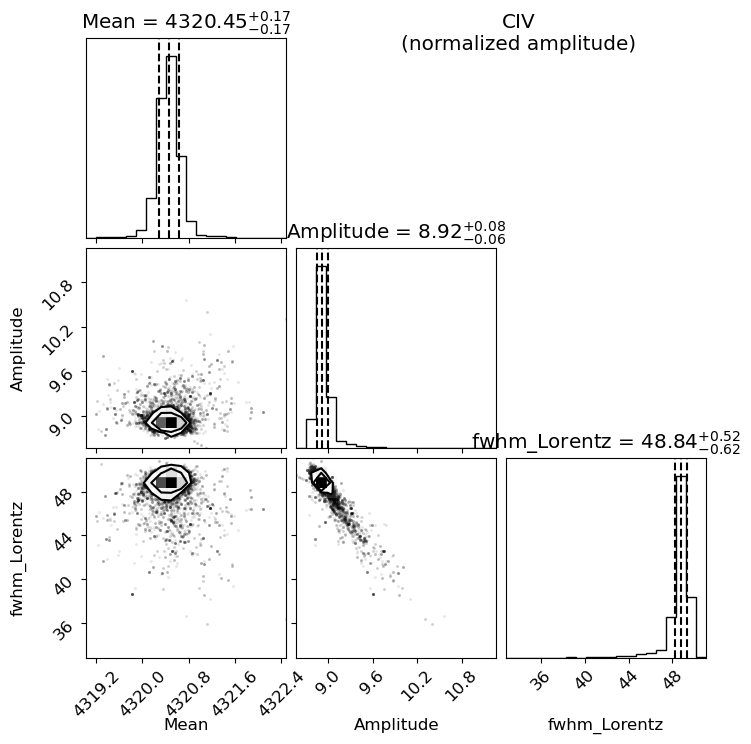

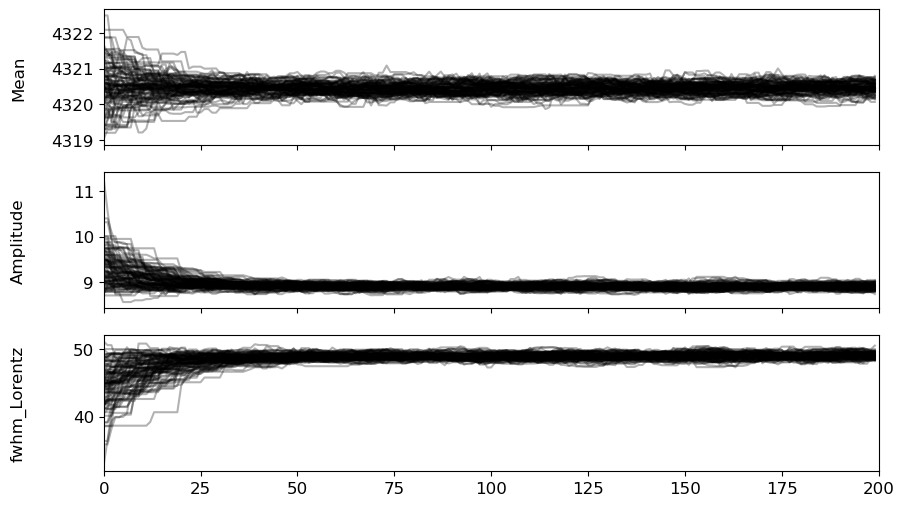

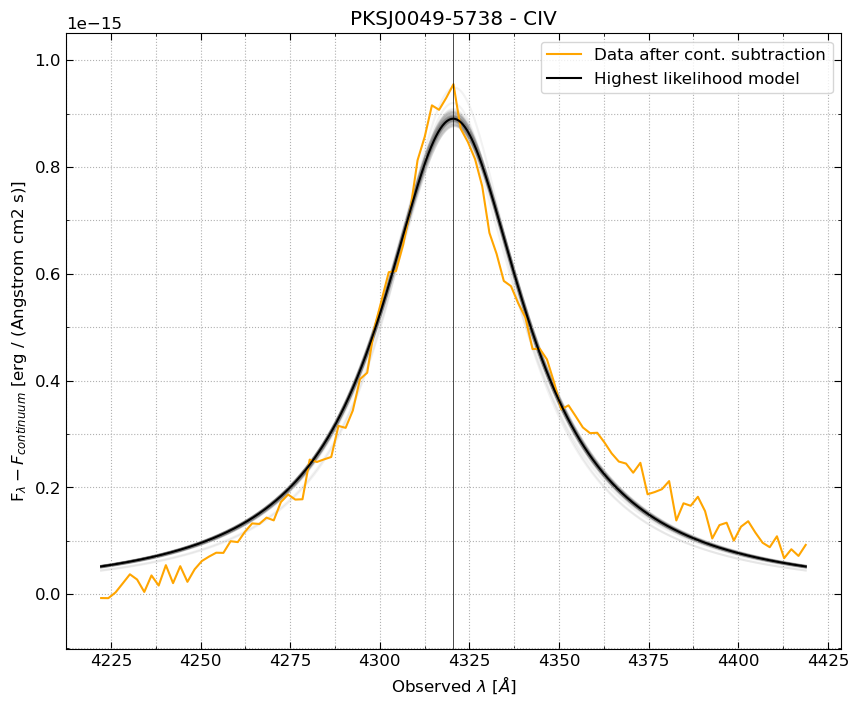

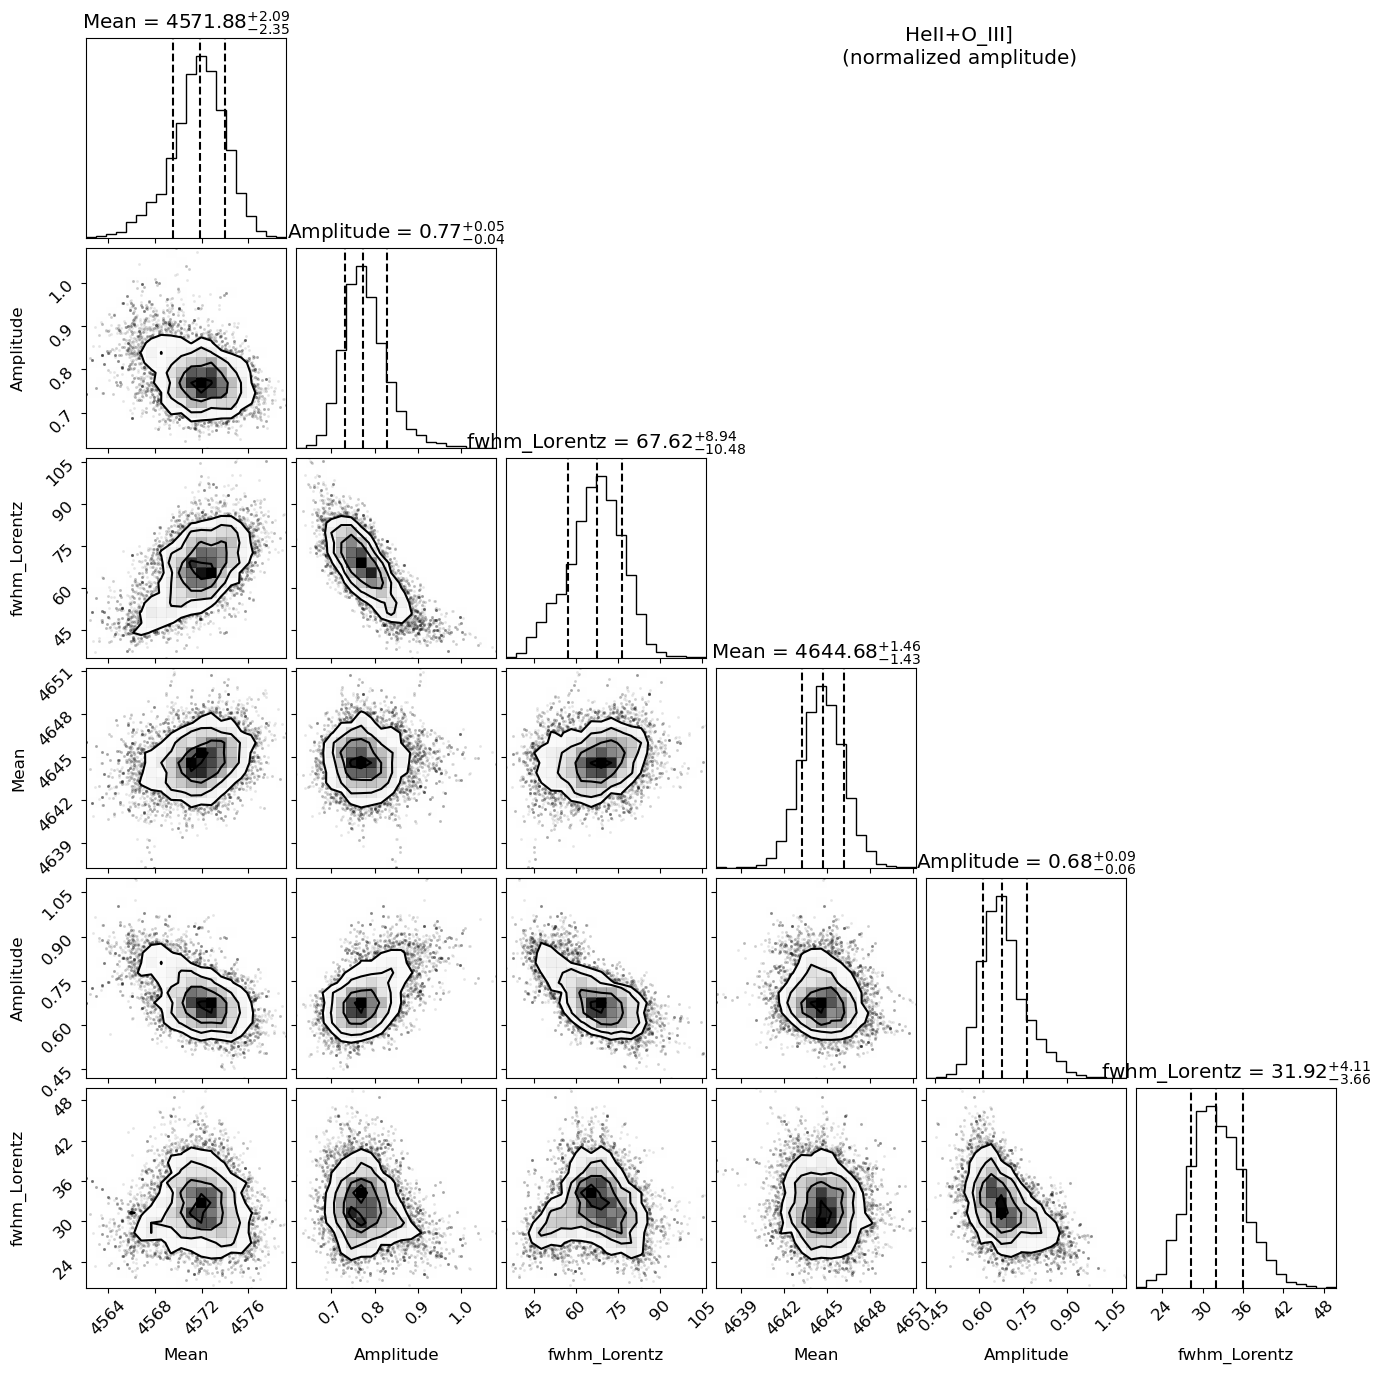

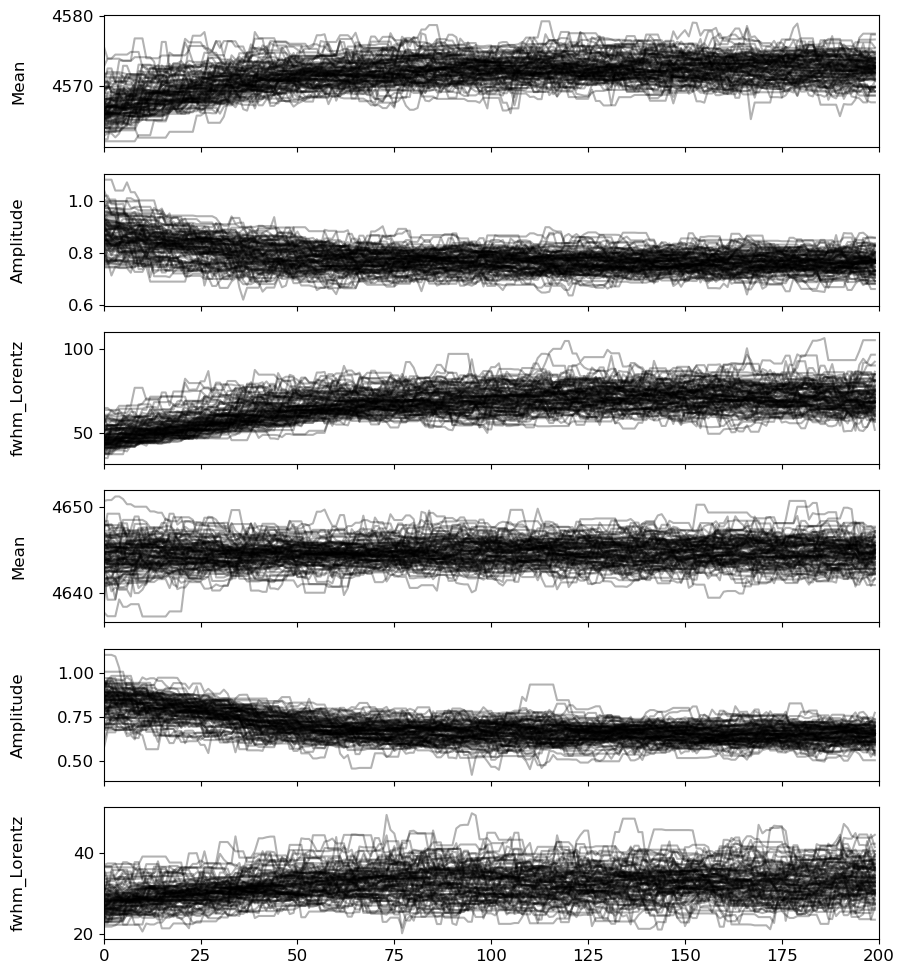

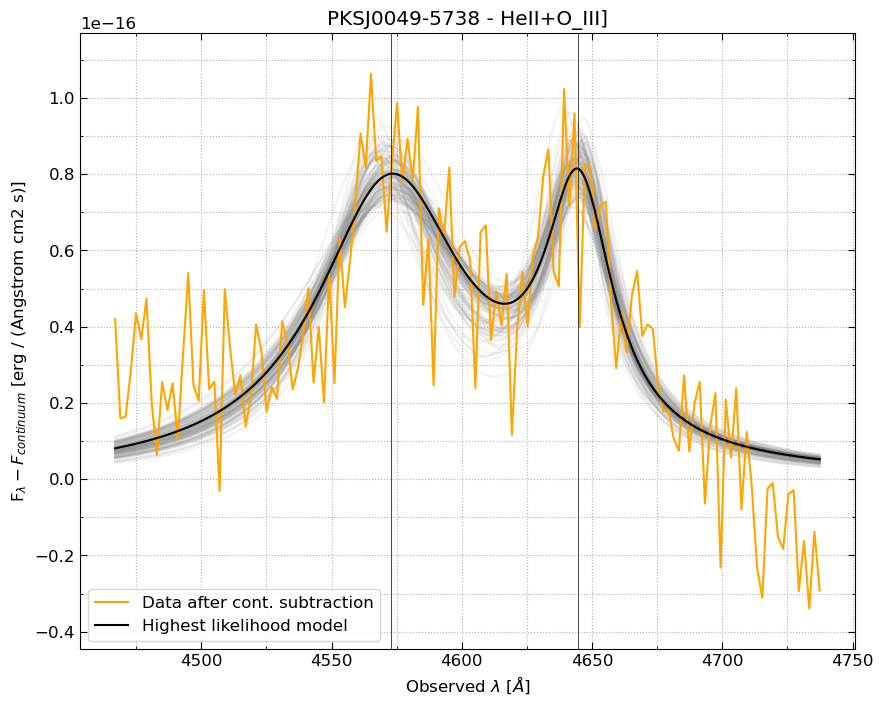

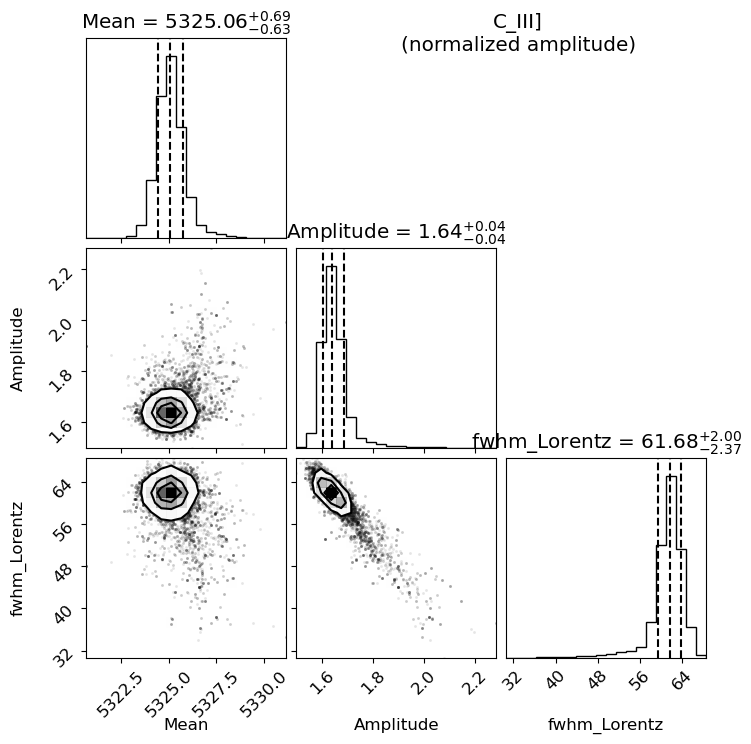

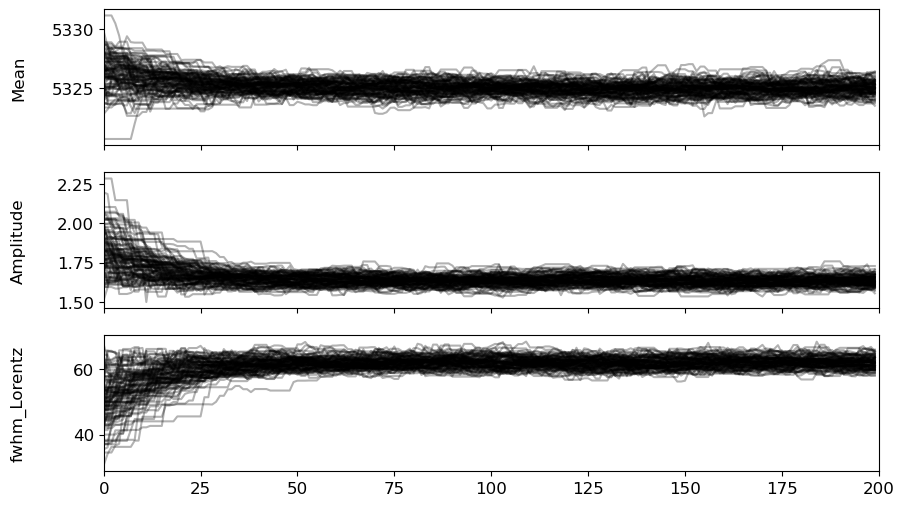

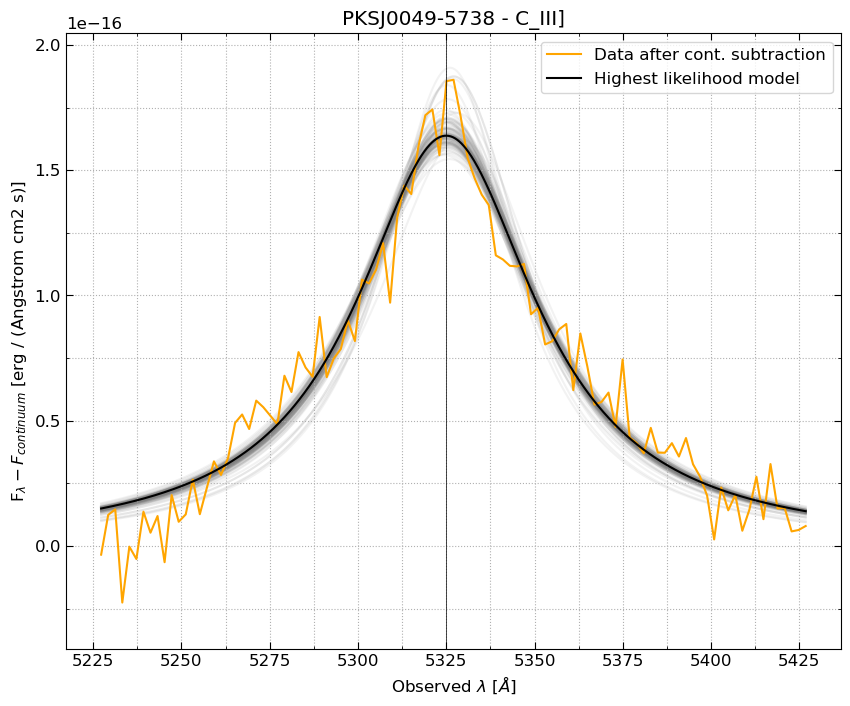

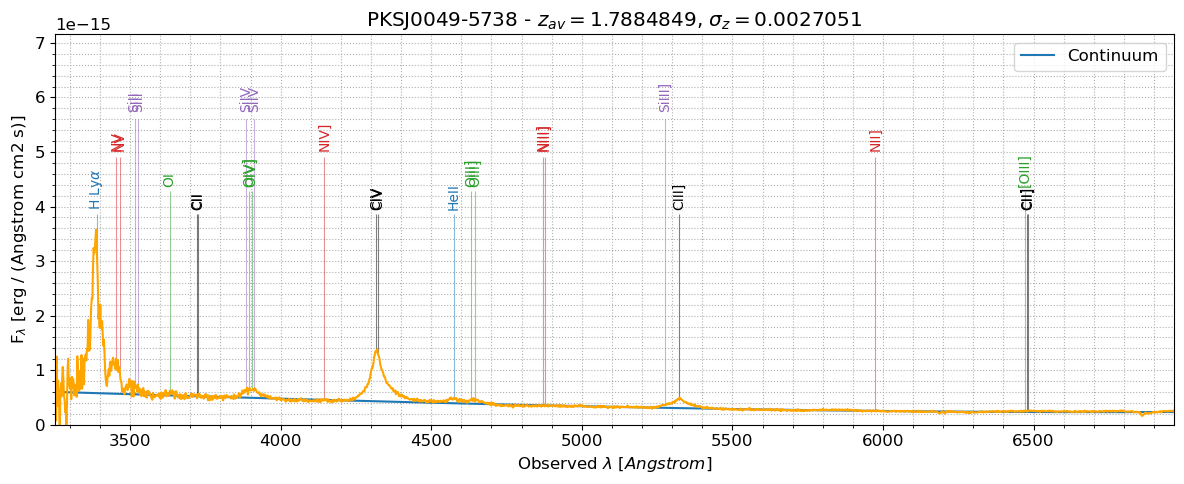

In [25]:
par_values_list , par_values_errors_list ,par_names_list, samples_list, line_windows = analysis.fit_lines(wavelengths,
                    flux_density, continuum_baseline, wavelength_peak_positions_slice, rest_frame_line_wavelengths,
                    peak_heights_slice, line_std_deviation_slice, blended_line_min_separation = 80, which_models=which_models,
                    line_names = line_names, overplot_archival_lines = overplot_archival_lines, priors = priors,
                    MCMC_walkers = 100, MCMC_iterations = 200, N_cores = 4, plot_spec = True, plot_MCMC = True,
                    overplot_median_model = False, save_results=True)

Great! We see that most of the lines are well fitted with our MCMC approach. In the last plot, we can see the overploted archival lines assuming that the target redshift is the average redshift for all 7 individual lines. One can also identify by eye that the CIV and NV lines are a bit blueshifted with respect to the average redshift (the reason behind this is a long story related to black hole winds).

This function is a bit hard to play, although it is extremely powerful. Give it a try!

If you are interested in the median model instead of the maximum likelihood model, you can activate the variable *overplot_median_model*. 

All of these results are saved in the output directory defined in the beginning of this tutorial in the function `analysis.load_calibrated_data()`. The saved parameters and corresponding errors are estimated based on the 16%, 50%, and 84% quantiles of the MCMC posterior distributions of parameters. If you prefer another way of estimating the parameters, you can play as you wish with the posterior distributions saved in the variable **samples_list** defined above. 

With the parameters for all the lines in hands, we can actually do some physics, as shown below.

## Recovering the equivalent width, FWHM, disp velocity etc

The plots below must be taken with a grain of salt. They are useful only for the isolated lines and must be ignored for blended lines (in our case Ly_alpha + NV and HeII+OIII]). These are diagnostic plots that help us to see the differences between the modeled and intrinsic line shapes.

<Figure size 1200x400 with 0 Axes>

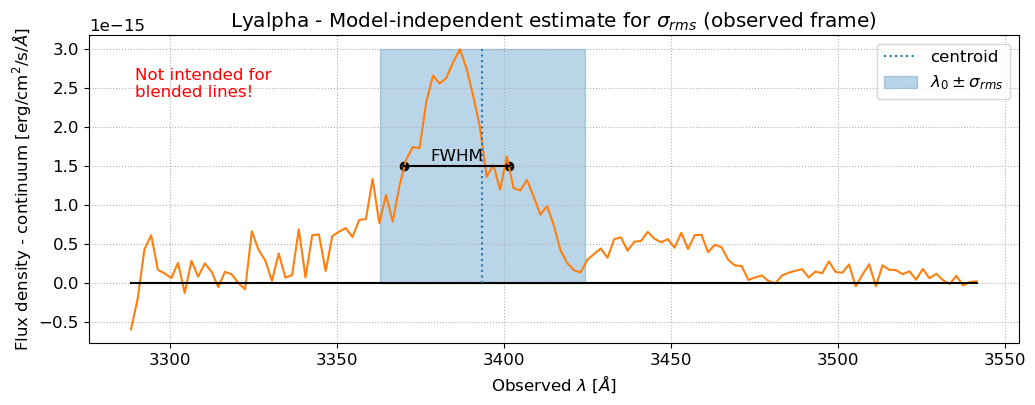

<Figure size 1200x400 with 0 Axes>

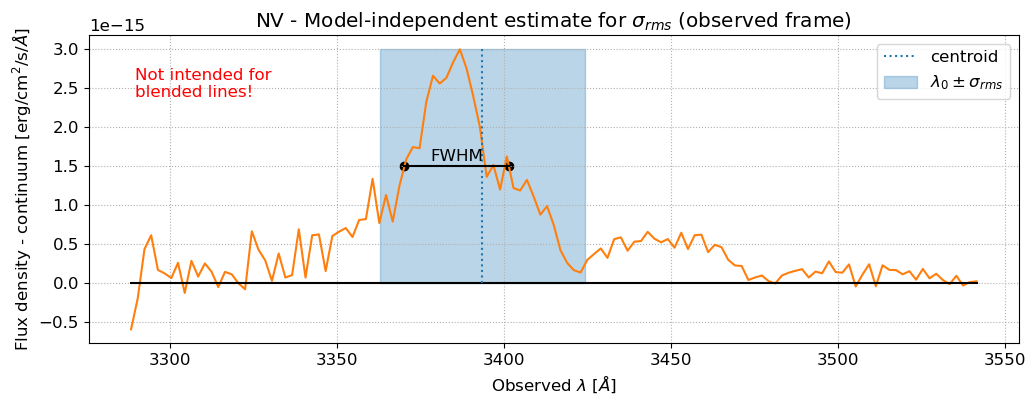

<Figure size 1200x400 with 0 Axes>

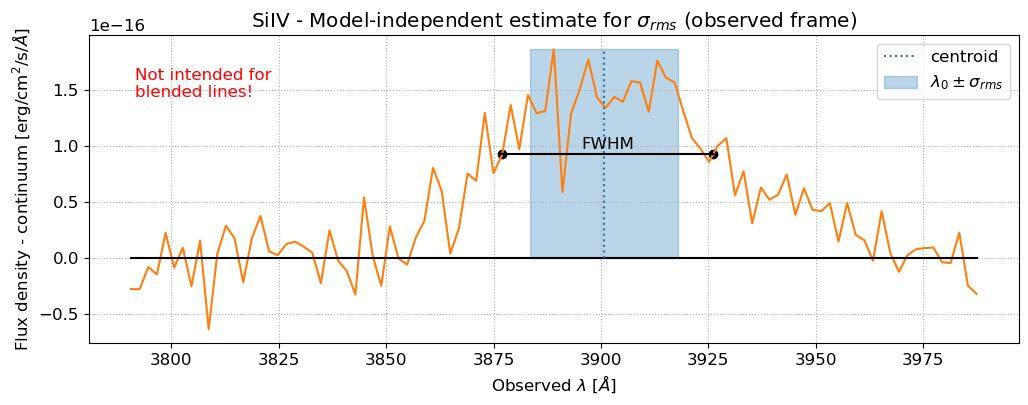

<Figure size 1200x400 with 0 Axes>

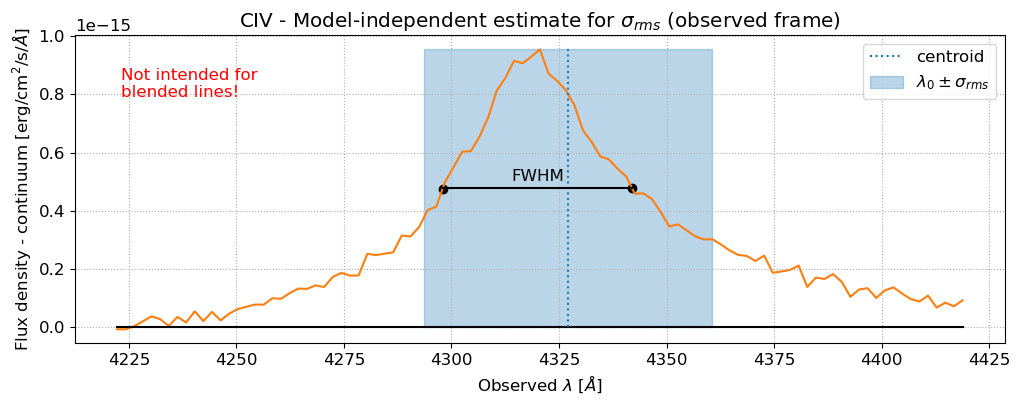

<Figure size 1200x400 with 0 Axes>

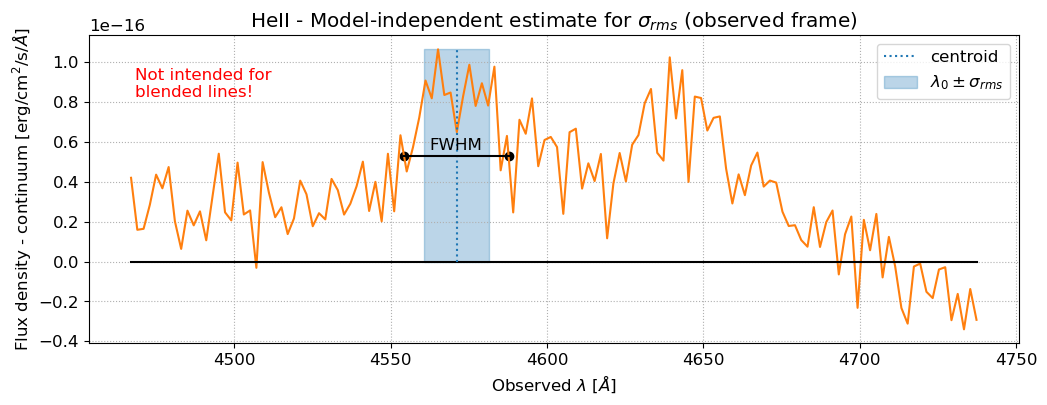

<Figure size 1200x400 with 0 Axes>

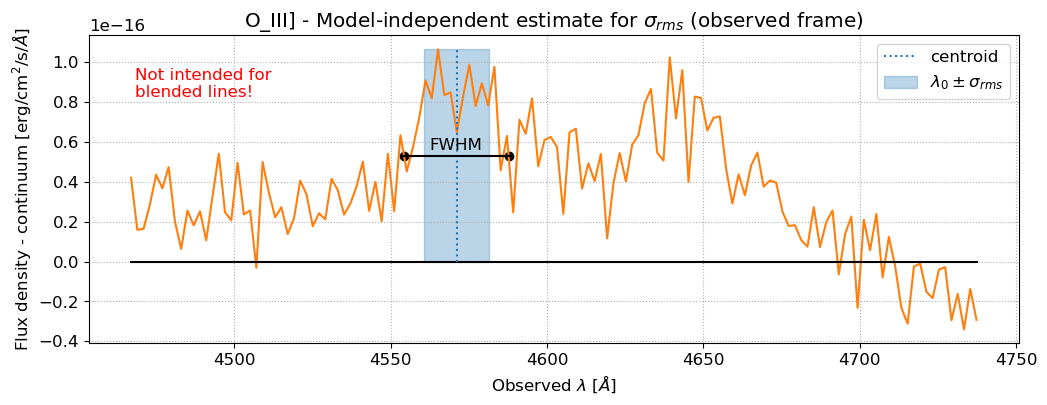

<Figure size 1200x400 with 0 Axes>

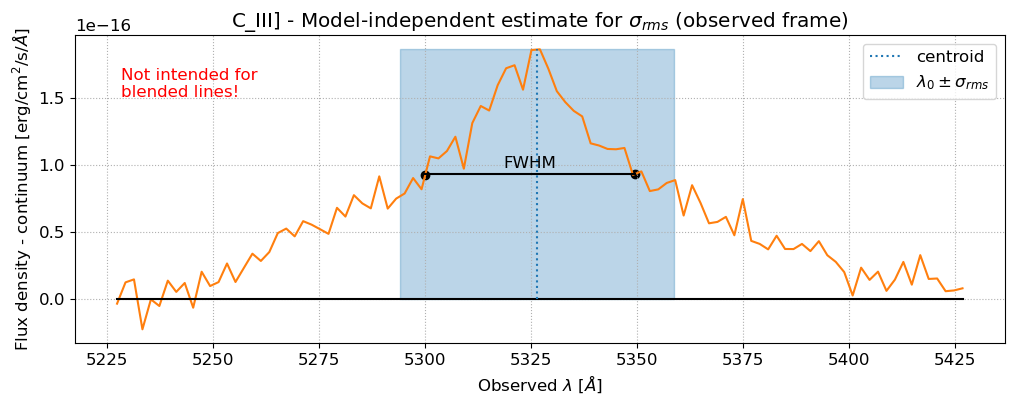

In [26]:
profile_equiv_width_rest_frame, modeled_equiv_width_rest_frame, profile_integrated_flux, modeled_integrated_flux, profile_rest_frame_disp_velocity, modeled_rest_frame_disp_velocity, profile_line_dispersion_rest_frame, profile_rest_frame_fwhm, modeled_rest_frame_fhwm = analysis.line_physics(wavelengths, flux_density, continuum_baseline, par_values_list, par_values_errors_list, par_names_list, line_windows, line_std_deviation, plot = True)

Ok, the results from this function are given as "profile" indicating that it follows the line profile and is independent of the modeling (i.e. Gaussian, Lorentzian or Voigt), and as "modeled" indicating the results based on the line models.

As a rule of thumb, if the line is symmetric around its peak, it is better to use the modeled values. If the line is asymmetric, it is generally better to use the "profile" values. **For the current spectrum, the only line for which we should preferentially use the "profile" values is the CIV line!**

The results from this function are **always** given in the rest frame.

All the results based on the line profile **are not recommended for blended lines**! The blended lines HeII and OIII] (or Ly_alpha and NV) show you this. **For blended lines, we must always use the modeled values instead of the profile values**.

Let's check them one by one (the first value represents the estimated MCMC value, and the following two values represent the asymmetrical errors).

In [27]:
profile_equiv_width_rest_frame

<Quantity [[-8.24056715e+01,  7.16819499e-01,  7.16812968e-01],
           [-8.23411321e+01,  7.18476803e-01,  7.18547571e-01],
           [-5.87800958e+00,  6.96102830e-02,  6.96121242e-02],
           [-4.84000347e+01,  9.89584843e-02,  9.89579256e-02],
           [-2.65899566e+00,  4.27019445e-02,  4.26974295e-02],
           [-2.65494273e+00,  4.27009630e-02,  4.27013438e-02],
           [-1.43502931e+01,  5.90742267e-02,  5.90793024e-02]] Angstrom>

In [28]:
modeled_equiv_width_rest_frame

<Quantity [[-76.88763223,   1.61490097,   1.28530792],
           [-10.57768482,   1.02054507,   0.74105616],
           [ -7.98975632,   0.17698726,   0.17523349],
           [-48.47432156,   0.19323143,   0.18592561],
           [ -6.28980001,   0.26417276,   0.23007798],
           [ -2.91487133,   0.11033723,   0.16689999],
           [-15.1498086 ,   0.16775952,   0.17265001]] Angstrom>

For asymmetrical lines or lines with long wings, these vbalues can be quite different since the **profile_equiv_width_rest_frame** will take into account the full (i.e. empyrical) line span.

The integrated fluxes below are measured as the profile or modeled equivalent width times the continuum computed at the line center:

In [29]:
profile_integrated_flux

<Quantity [[1.32823306e-13, 1.15536678e-15, 1.15536678e-15],
           [1.30216812e-13, 1.13571578e-15, 1.13571578e-15],
           [8.08786020e-15, 9.57372534e-17, 9.57372534e-17],
           [5.79053420e-14, 1.18369927e-16, 1.18369927e-16],
           [2.91690938e-15, 4.68199754e-17, 4.68199754e-17],
           [2.84311010e-15, 4.57189991e-17, 4.57189991e-17],
           [1.21895881e-14, 5.01590367e-17, 5.01590367e-17]] erg / (cm2 s)>

In [30]:
modeled_integrated_flux

<Quantity [[1.23929206e-13, 2.60292621e-15, 2.07167889e-15],
           [1.67278777e-14, 1.61391565e-15, 1.17192103e-15],
           [1.09935228e-14, 2.43494640e-16, 2.41081228e-16],
           [5.79942182e-14, 2.31168397e-16, 2.22427316e-16],
           [6.89988964e-15, 2.89775012e-16, 2.52369944e-16],
           [3.12146098e-15, 1.18153408e-16, 1.78726340e-16],
           [1.28687216e-14, 1.42492162e-16, 1.46646520e-16]] erg / (cm2 s)>

The modeled dispersion velocity shown below is then computed as $v = \frac{1}{2} \times c \times \frac{FWHM}{\lambda_0}$ for a Lorentzian profile, or as $v = \frac{1}{2\sqrt{2\ln 2}} \times c \times \frac{FWHM}{\lambda_0}$ for a Gaussian or Voigt profile. Here $c$ is the speed of light and $\lambda_0$ is the line peak position in wavelength. For the profile dispersion velocity we do $v = c \times \frac{\sigma_{rms}}{\lambda_0}$, where $\sigma_{rms}$ is the line dispersion (see the definition below).

In [31]:
profile_rest_frame_disp_velocity

<Quantity [[2714.28155444,   80.55163474,   80.55157168],
           [2661.47117611,   81.38701983,   81.38767255],
           [1317.84377779,   40.89484269,   40.89500022],
           [2327.6063969 ,   38.100634  ,   38.10063064],
           [ 683.80883941,   32.33467403,   32.33427971],
           [ 673.09129324,   31.96637782,   31.96641051],
           [1817.785157  ,   36.84500769,   36.84513827]] km / s>

In [32]:
modeled_rest_frame_disp_velocity

<Quantity [[1379.84861733,  111.69977039,   16.15099331],
           [ 987.32388653,  381.84472845,  193.80593281],
           [1917.52577207,  140.33706287,  140.80701248],
           [1694.60663356,   21.4463308 ,   17.93546883],
           [2217.03855307,  343.73081756,  293.20043205],
           [1030.27099669,  118.10523026,  132.56007677],
           [1736.33000172,   66.76213277,   56.37603234]] km / s>

The line dispersion (or root mean square width) is computed as $\sigma_{rms} = \sqrt{\int (\lambda-\lambda_c)^2 F(\lambda) d\lambda ~/ \int F(\lambda) d\lambda}$, where $F(\lambda)$ is the interpolated line profile and $\lambda_c$ is the line centroid.

In [33]:
profile_line_dispersion_rest_frame

<Quantity [[11.00651657,  0.14851446,  0.1485139 ],
           [10.99789636,  0.15757771,  0.15758347],
           [ 6.14540344,  0.05080957,  0.05081232],
           [12.02652773,  0.05404913,  0.05404907],
           [ 3.74170085,  0.04366009,  0.04365134],
           [ 3.73599763,  0.04394958,  0.04395031],
           [11.57356778,  0.07677316,  0.0767757 ]] Angstrom>

Finally, the rest frame FWHM is computed directly from the fit done in the function analysis.fit_lines() for the Gaussian and Lorentzian models. For the Voigt model, where the fit gives us the Gaussian and Lorentzian FWHMs, we approximate $FWHM_{Voigt} = 0.5346FWHM_{Lorentz} + \sqrt{0.2166FWHM_{Lorentz}^2 + FWHM_{Gauss}^2}$. The asymmetrical errors are propagated and take into account the redshift error. 

The profile FHWM is independent on the modeling, but depends on the interpolated intrinsic line profile.

In [34]:
profile_rest_frame_fwhm

<Quantity [[11.23455654,  2.49383921,  2.49383918],
           [11.22575773,  2.42379597,  2.42379636],
           [17.60401157,  3.66010167,  3.66010198],
           [15.78504975,  0.35923678,  0.35923676],
           [12.00423641, 14.66874762, 14.66874736],
           [11.98593915, 14.4229427 , 14.42294272],
           [17.71423161,  2.167792  ,  2.16779221]] Angstrom>

In [35]:
modeled_rest_frame_fhwm

<Quantity [[11.19067891,  0.90589394,  0.13098633],
           [ 8.15976207,  3.15576568,  1.60171553],
           [17.88371227,  1.30886234,  1.31324615],
           [17.51175258,  0.22162356,  0.18534314],
           [24.26261426,  3.76170901,  3.20871797],
           [11.43705182,  1.31109243,  1.47155556],
           [22.10990985,  0.85013312,  0.71788133]] Angstrom>

### Computing the BH mass

For the specific case of AGNs, we also allow the user to compute the black hole masses using the CIV, MgII, Hbeta or Halpha lines. In our current case, we have only CIV line available, so we can do:

In [36]:
log10_BH_mass_CIV = analysis.BH_mass_CIV_VP2006(wavelengths, continuum_baseline, FWHM_CIV=profile_rest_frame_fwhm[3][0], par_values_CIV=par_values_list[3], H0=70)
log10_BH_mass_CIV

[9.023817555033505, 0.36]

This is the black hole mass given in log scale and in terms of solar masses. This function is called BH_mass_CIV_VP2006 because it is based on the work published by M Vestergaard & BM Peterson, 2006.